In [1]:
from collections import defaultdict as dt
data=list(open("../dblp.txt",encoding="utf-8"))

In [2]:
import re
stop_words={"-","a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","en","de","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","based","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"}
reg = '\\"|\\.|\\,|\\(|\\)|\\[|\\]|\\,|:|”|\\+|\\?|\\*'
authors=dt(lambda:dt(int))
words=dt(lambda:dt(int))
c=d=0
for i in range(len(data)):
    if len(data[i])<3:continue
    if data[i][1]=='*' and data[i+1][1]=='@' and data[i+2][1]=='t':
        year=int(data[i+2][2:])
        if year>=1970 and year<2022:
            for k in (j for j in re.sub(reg," ",data[i][2:].lower().replace("'"," ").replace("\\","")).replace("\n","").split() 
           if j!='' and j not in stop_words and not j.isnumeric()):
                words[k][year]+=1
            for j in data[i+1][2:].split(","):
                j=j.strip()
                if j!='':
                    authors[j][year]+=1
            
    if i%1000000==0:
        print(i,end='\r')
print(len(authors),len(words))

3240367 978966


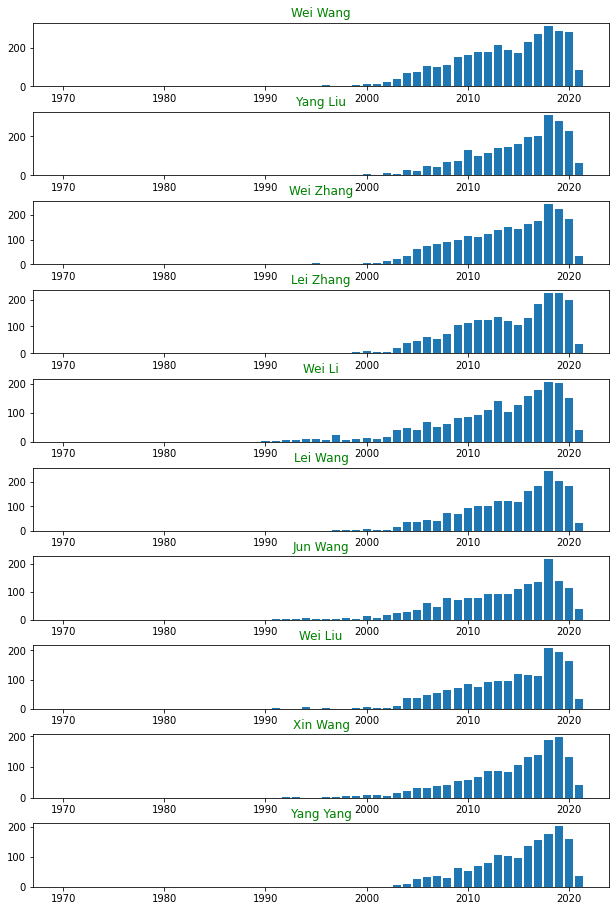

In [3]:
z=sorted((j for j in authors.keys()),key=lambda i:sum(authors[i].values()),reverse=True)[:10]
from matplotlib import pyplot as plt
fig,axis=plt.subplots(10,1,figsize=(10,15))
years=list(range(1970,2022))
for i in range(10):
    qq=authors[z[i]]
    axis[i].bar(years,[qq[j] for j in years])
    axis[i].set_title(z[i],color='green')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('authors_years.png')

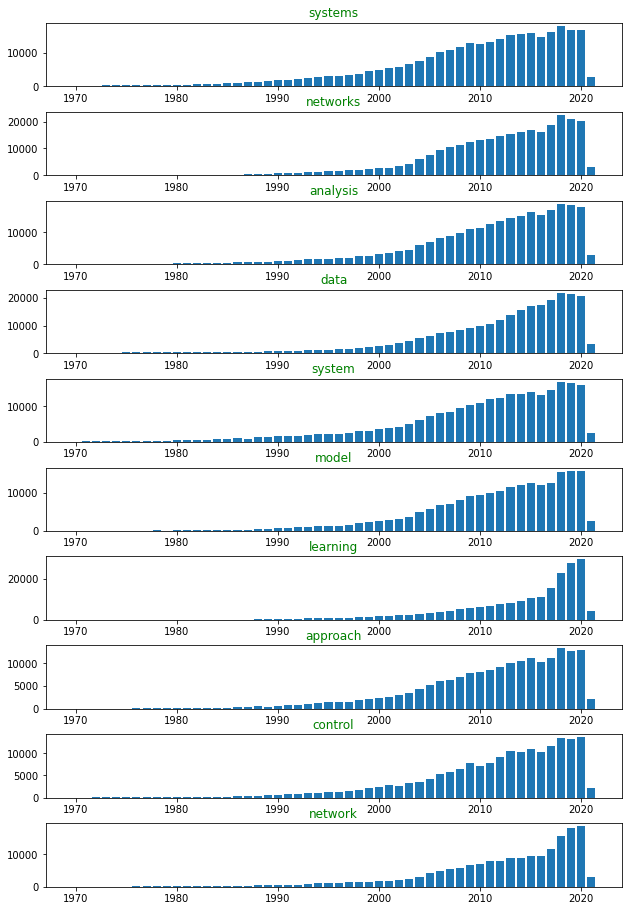

In [4]:
z=sorted((j for j in words.keys()),key=lambda i:sum(words[i].values()),reverse=True)[:10]
from matplotlib import pyplot as plt
fig,axis=plt.subplots(10,1,figsize=(10,15))
years=list(range(1970,2022))
for i in range(10):
    qq=words[z[i]]
    axis[i].bar(years,[qq[j] for j in years])
    axis[i].set_title(z[i],color='green')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('words_years.png')

In [5]:
file=open("authors_years.csv",'w',encoding="utf-8")
file.write("author")
for i in range(1970,2022):
    file.write(","+str(i))
for j in authors:
    file.write("\n"+j)
    for i in range(1970,2022):
        file.write(","+str(authors[j][i]))

In [6]:
file=open("words_years.csv",'w',encoding="utf-8")
file.write("word")
for i in range(1970,2022):
    file.write(","+str(i))
for j in words:
    file.write("\n"+j)
    for i in range(1970,2022):
        file.write(","+str(words[j][i]))

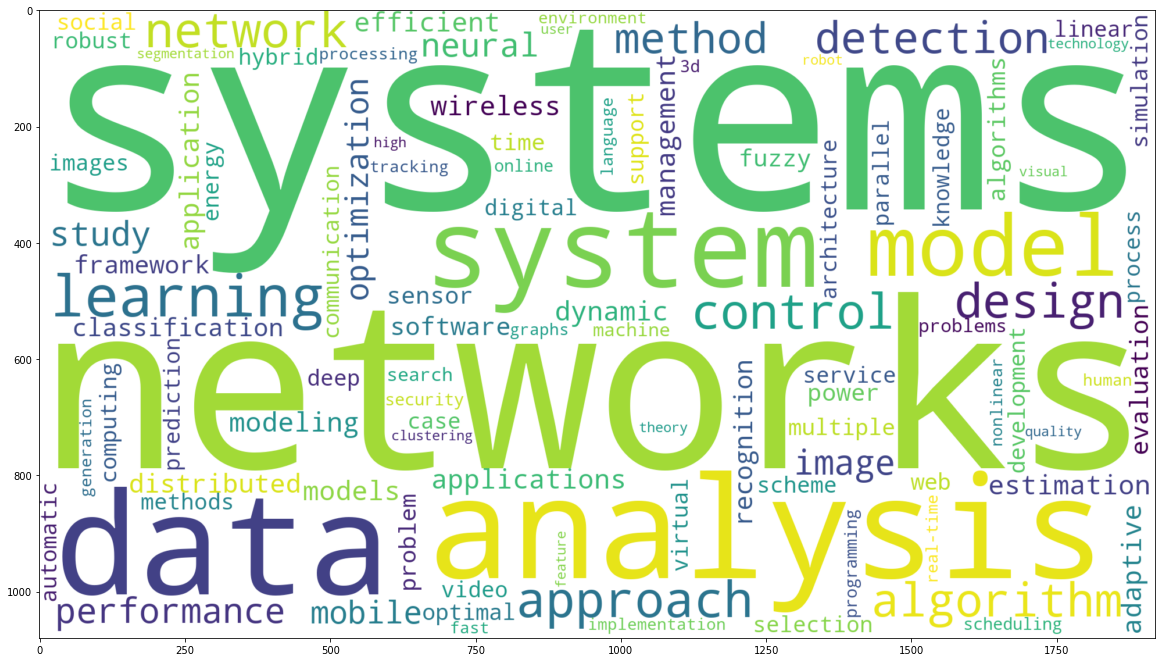

In [7]:
from wordcloud import WordCloud
z=sorted((j for j in words.keys()),key=lambda i:sum(words[i].values()),reverse=True)[:100]
freq={i:sum(words[i].values()) for i in z}
wordcloud=WordCloud(max_font_size=500,background_color="white",width=1920,height=1080).generate_from_frequencies(freq)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig("titlewords_wordcloud.png")

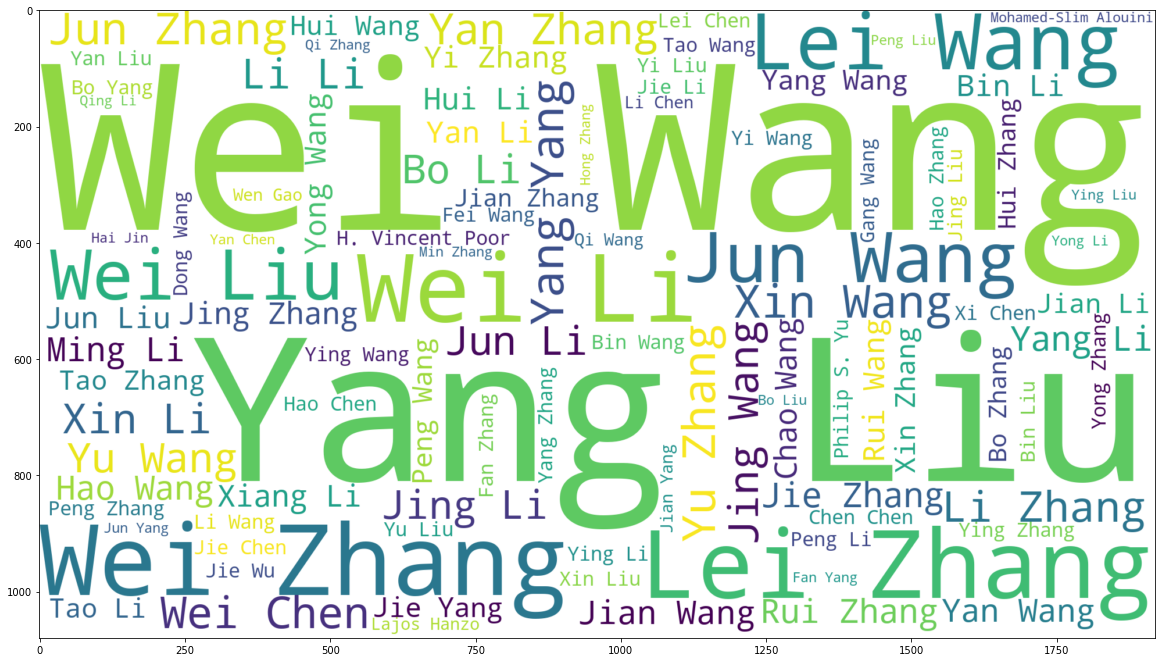

In [8]:

z=sorted((j for j in authors.keys()),key=lambda i:sum(authors[i].values()),reverse=True)[:100]
freq={i:sum(authors[i].values()) for i in z}
wordcloud=WordCloud(max_font_size=500,background_color="white",width=1920,height=1080).generate_from_frequencies(freq)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig("authors_wordcloud.png")